## For more information, read [Cortez et al., 2009]. 
## Input variables (based on physicochemical tests): 
#### 1 - fixed acidity 
#### 2 - volatile acidity 
#### 3 - citric acid 
#### 4 - residual sugar 
#### 5 - chlorides 
#### 6 - free sulfur dioxide 
#### 7 - total sulfur dioxide 
#### 8 - density 
#### 9 - pH 
#### 10 - sulphates 
#### 11 - alcohol 
#### Output variable (based on sensory data): 
#### 12 - quality (score between 0 and 10)

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

%matplotlib inline


In [83]:
wine_q = pd.read_csv('winequality-red.csv', sep=';')
wine_q['category'] = pd.cut(wine_q['quality'], [3,5,8],labels=['Bad','Good'])
wine_q = wine_q[wine_q['category'].isin(['Bad','Good'])].copy()
wine_q['category'] = pd.cut(wine_q['quality'], [3,5,8],labels=[0.0,1.0])
del wine_q['quality']
wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

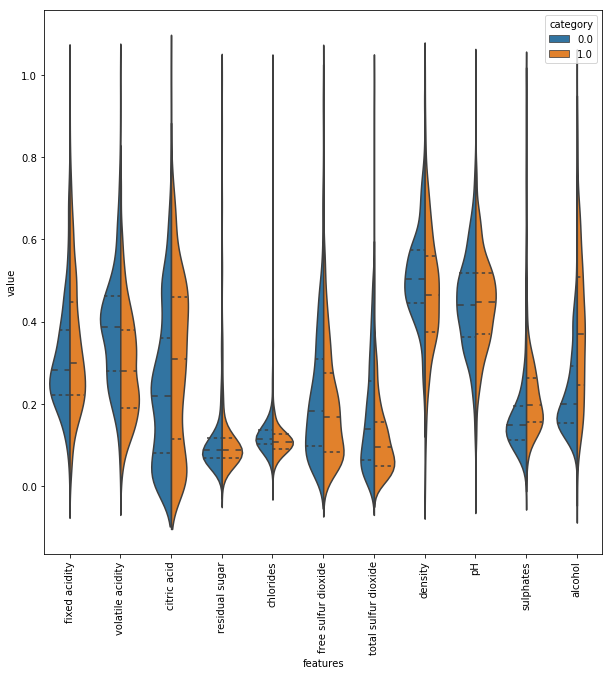

In [84]:
plt.figure(figsize=(10,10))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_wine_q = scaler.fit_transform(wine_q)
scaled_wine_q_df = pd.DataFrame(scaled_wine_q, columns=wine_q.columns)
data = pd.melt(scaled_wine_q_df,id_vars="category",
                    var_name="features",
                    value_name='value')
sns.violinplot(x="features", y="value", hue="category", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# Features with good influence in quality as the Graph above shows


- Volatile acidity
- citric acid
- density
- sulphates
- alcohol

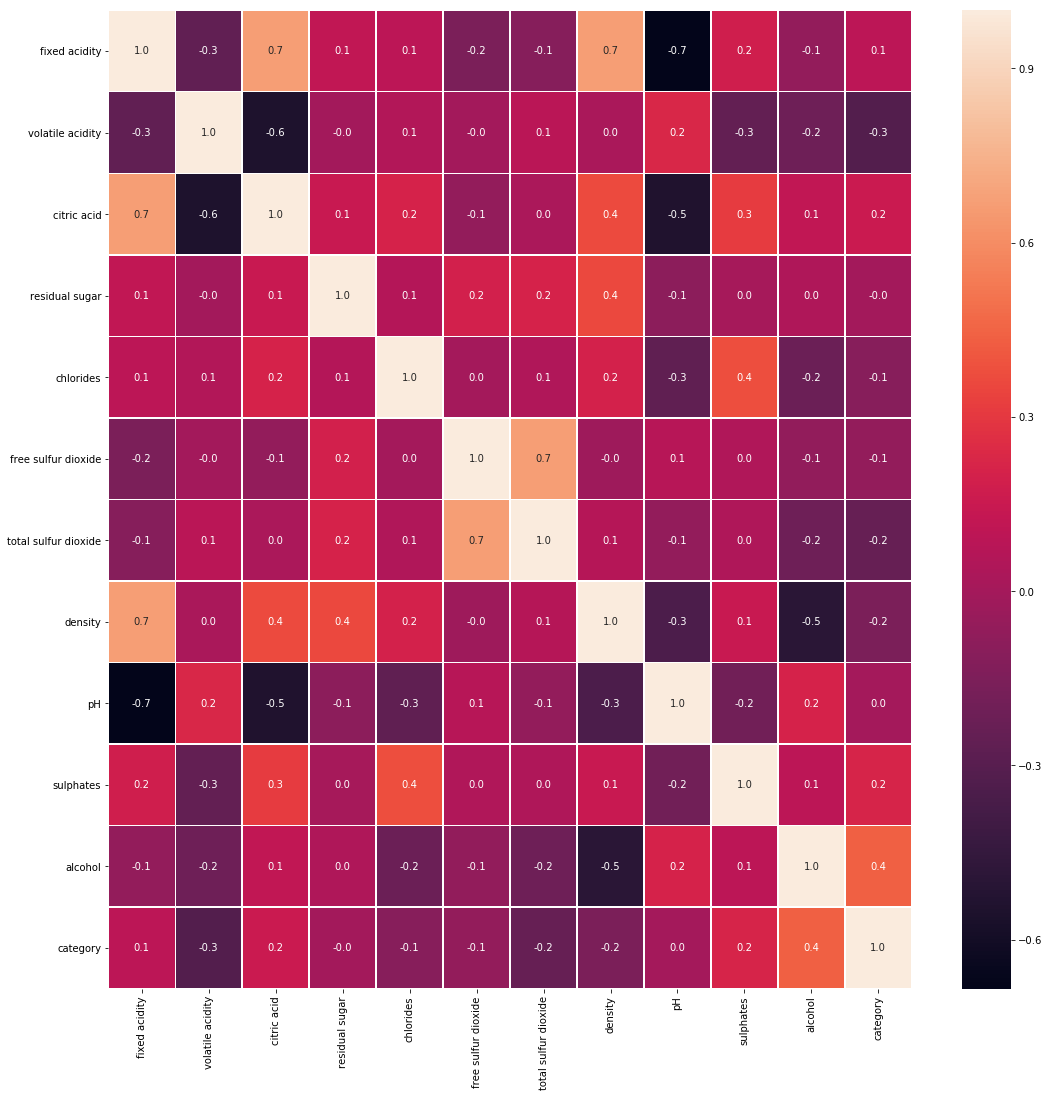

In [85]:
plt.figure(figsize=(18,18))
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(scaled_wine_q_df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature correlations on Heat map

- Density and Fixed acidity has high correlation

- Fixed acidity and citric acid has high correlation

- Total sulfur dioxide and free sulfur dioxide has high correlation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

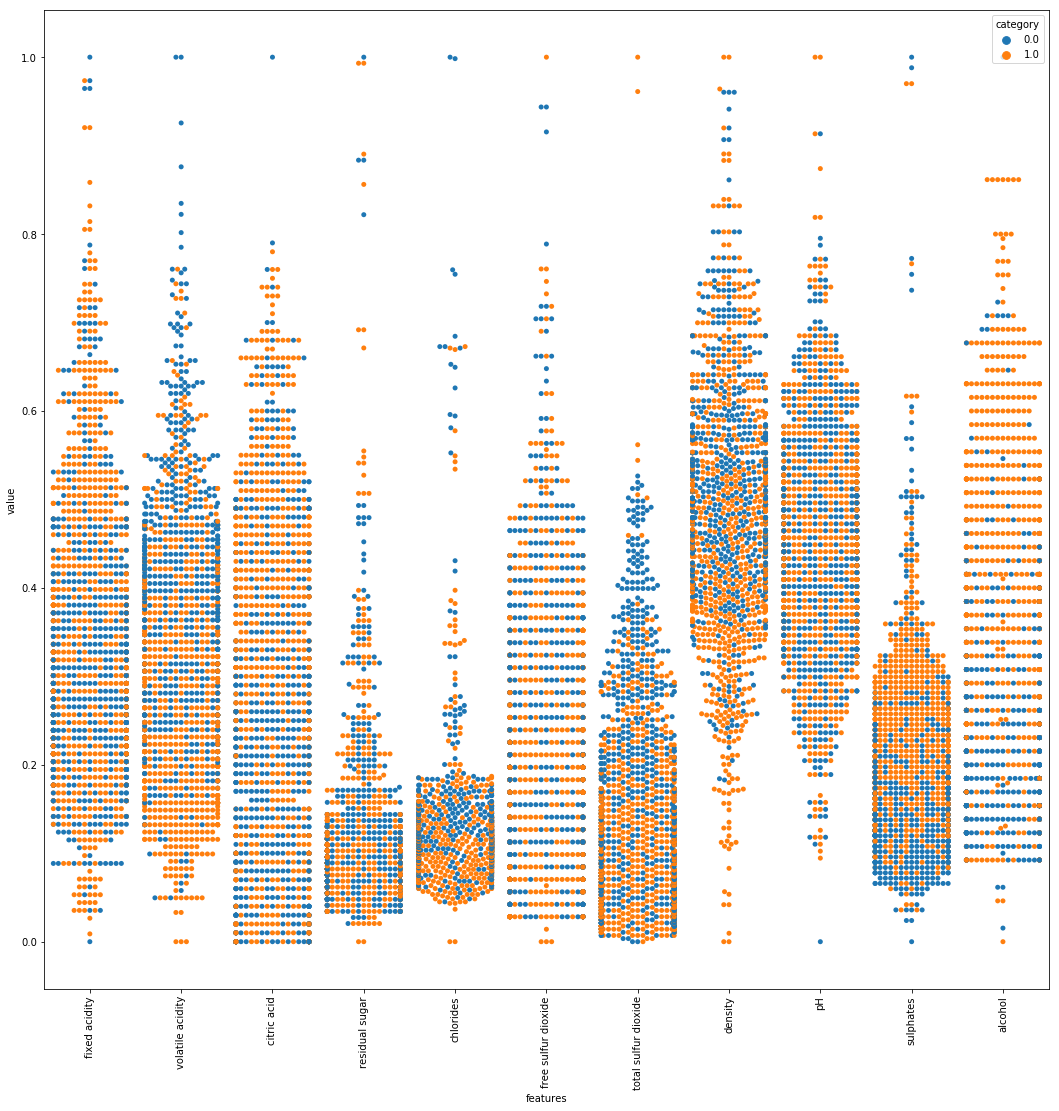

In [86]:
data = pd.melt(scaled_wine_q_df,id_vars="category",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,18))
sns.swarmplot(x="features", y="value", hue="category", data=data)
plt.xticks(rotation=90)

# Feature influence

#### As the graph above shows, the most influent features are:
- the alcohol and sulphates

#### Others are :
- the volatile acidity, citric acid, total sulfur dioxide and density

#### based on this analisys, the best features to use for classifications are:
- ['volatile acidity','citric acid','total sulfur dioxide','sulphates','alcohol', 'density']

#### Classification model: nn_model.py

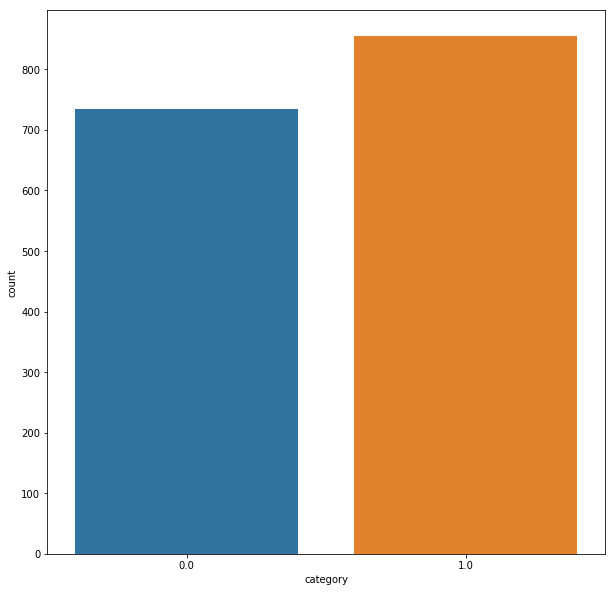

In [87]:
plt.figure(figsize=(10,10))
x = sns.countplot(wine_q['category'],label="Count")

In [88]:
good, bad = wine_q['category'].value_counts()
print(good,bad)

855 734
